In [11]:
from __future__ import division

import skimage
from skimage import data
from skimage import io
import numpy as np

In [12]:
# Implementing order-statistical filter.
def filter(image, wsz):
    # Original image is w / h.
    w = image.shape[0]
    h = image.shape[1]
    # Scaled original image is (wsz-1 w wsz-1) / (wsz-1 h wsz-1).
    scaled = np.zeros(shape=(w+2*wsz-2, h+2*wsz-2))
    for i in range(0, w):
        for j in range(0, h):
            scaled[i+wsz-1][j+wsz-1] = image[i][j]
    # Result is (wsz/2-1 w wsz/2-1) / (wsz/2-1 h wsz/2-1).
    result = np.zeros(shape=(w+wsz-1, h+wsz-1))
    # Iterating through result image with scaled indices.
    for i in range(wsz//2, w+wsz//2-1):
        for j in range(wsz//2, h+wsz-1):
            s = []
            for k in range(i-wsz//2, i+wsz//2+1):
                for p in range(j-wsz//2, j+wsz//2+1):
                    s.append(scaled[k][p])
            srt = np.flip(np.sort(s), 0)
            result[i-wsz//2][j-wsz//2] = srt[wsz-1]
    return result

Raw image:


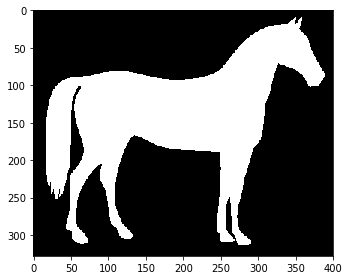

applying 3x3 filter:


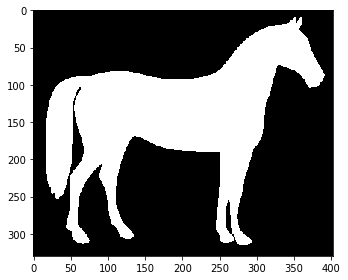

applying 5x5 filter:


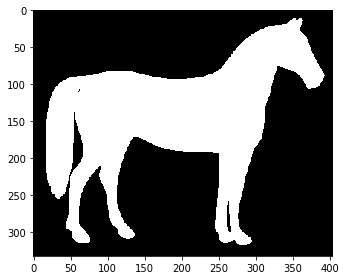

applying 7x7 filter:


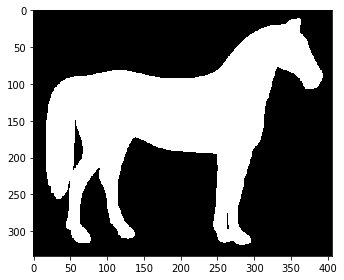

In [13]:
# Binary image examples.
image = skimage.data.horse()
image = np.invert(image)
print('Raw image:')
io.imshow(image)
io.show()

print("applying 3x3 filter:")
im = filter(image, 3)
io.imshow(im)
io.show()

print("applying 5x5 filter:")
im = filter(image, 5)
io.imshow(im)
io.show()

print("applying 7x7 filter:")
im = filter(image, 7)
io.imshow(im)
io.show()

Raw image:


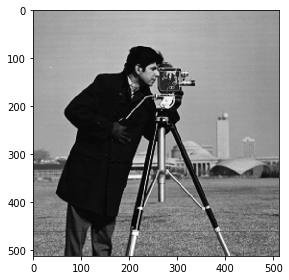

applying 3x3 filter:


/usr/local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


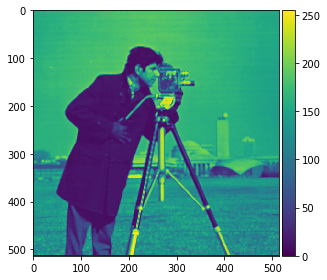

applying 5x5 filter:


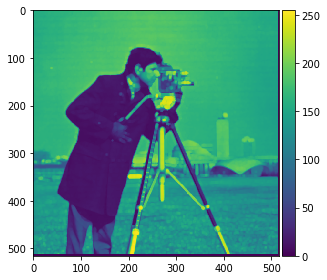

applying 7x7 filter:


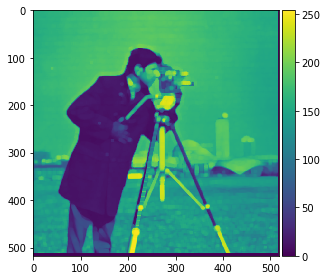

In [14]:
# Grayscale image examples.
image = skimage.data.camera()
print('Raw image:')
io.imshow(image)
io.show()

print("applying 3x3 filter:")
im = filter(image, 3)
io.imshow(im)
io.show()

print("applying 5x5 filter:")
im = filter(image, 5)
io.imshow(im)
io.show()

print("applying 7x7 filter:")
im = filter(image, 7)
io.imshow(im)
io.show()